In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(9620)
sns.set(style='ticks', context='talk')
plt.style.use("paper.mplstyle")

## Population Definition

### Linear Model

In [2]:
def f(x, m, b):
    return m*x + b

# size = 100000
# m = 0.75
# b = 0

# x = np.linspace(0, 1, size)
# sort_idx = np.argsort(x)
# y = f(x, m, b)[sort_idx]


### Bivariate Normal

In [3]:
size = 1000000
rho_xy = 0.25
sigma_x = 1
sigma_y = 1
cov_xy = rho_xy * (sigma_x * sigma_y)
cov = np.array([[sigma_x,    cov_xy], 
                [ cov_xy,   sigma_y]])
m = rho_xy * (cov[1,1] / cov[0,0])
b = 0

population_dist = stats.multivariate_normal(cov=cov)
population_sample = population_dist.rvs(size)
x, y = population_sample[:, 0], population_sample[:, 1]

print("Population Correlation:", stats.pearsonr(x, y)[0])

Population Correlation: 0.25009924154069596


## Measurement Sample 1

Both x and y has single value errors with error ratio of 1.

,x,xerr,y,yerr
45,-2.862730,0.1,0.096562,0.1
23,-2.517869,0.1,-1.919216,0.1
22,-1.859305,0.1,-0.135900,0.1
31,-1.797351,0.1,-1.101550,0.1
0,-1.691101,0.1,-1.509843,0.1


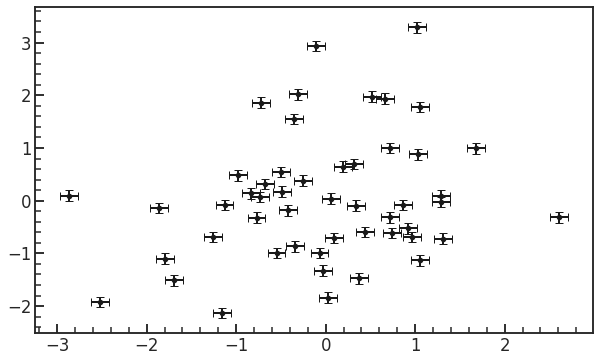

In [4]:
data_size = 50
data_idx = np.random.randint(0, size, size=data_size)

# sigma_x = np.random.uniform(low=0, high=0.5, size=data_size)
# sigma_y = np.random.uniform(low=0, high=0.1, size=data_size)
sigma_x = [0.1]*data_size
sigma_y = [0.1]*data_size
xerr = stats.norm(loc=0, scale=sigma_x).rvs(data_size)
yerr = stats.norm(loc=0, scale=sigma_y).rvs(data_size)
xdata = x[data_idx] + xerr
ydata = y[data_idx] + yerr

df1 = pd.DataFrame(
    {
        "x": xdata,
        "xerr": sigma_x,
        "y": ydata,
        "yerr": sigma_y,
    }
).sort_values('x')

plt.errorbar(df1.x, df1.y, yerr=df1.yerr, xerr=df1.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
df1.head()

## Measurement Sample 2

Both x and y has single value errors with error ratio x of y being 5

,x,xerr,y,yerr
27,-3.195819,0.5,0.153477,0.1
40,-3.026226,0.5,-2.429675,0.1
20,-2.726002,0.5,-1.584838,0.1
43,-2.522525,0.5,-0.714791,0.1
15,-2.307793,0.5,-0.047916,0.1


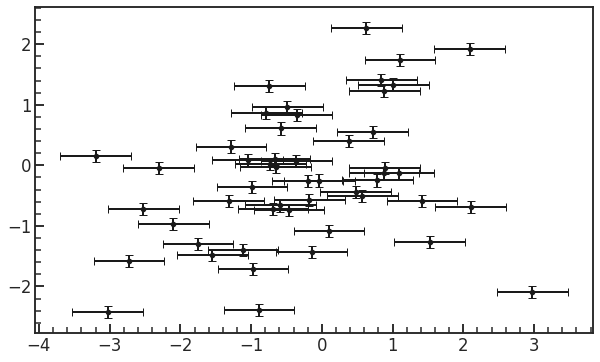

In [5]:
data_size = 50
data_idx = np.random.randint(0, size, size=data_size)

# sigma_x = np.random.uniform(low=0, high=0.5, size=data_size)
# sigma_y = np.random.uniform(low=0, high=0.1, size=data_size)
sigma_x = [0.5]*data_size
sigma_y = [0.1]*data_size
xerr = stats.norm(loc=0, scale=sigma_x).rvs(data_size)
yerr = stats.norm(loc=0, scale=sigma_y).rvs(data_size)
xdata = x[data_idx] + xerr
ydata = y[data_idx] + yerr

df2 = pd.DataFrame(
    {
        "x": xdata,
        "xerr": sigma_x,
        "y": ydata,
        "yerr": sigma_y,
    }
).sort_values('x')

plt.errorbar(df2.x, df2.y, yerr=df2.yerr, xerr=df2.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
df2.head()

## Measurement Sample 3

Both x and y has errors of variance uniformly assigned. The error ratio is about 5

,x,xerr,y,yerr
43,-1.977897,0.016251,-1.105455,0.089907
12,-1.870961,0.370347,-0.058519,0.099778
49,-1.409371,0.385497,0.957041,0.089890
39,-1.266031,0.237852,0.295061,0.019503
13,-0.886445,0.112282,-0.714295,0.081949


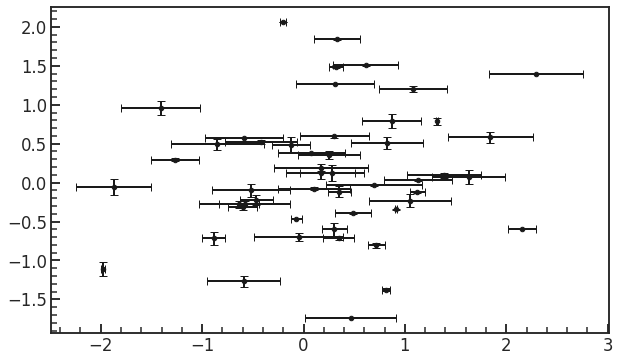

In [6]:
data_size = 50
data_idx = np.random.randint(0, size, size=data_size)

sigma_x = np.random.uniform(low=0, high=0.5, size=data_size)
sigma_y = np.random.uniform(low=0, high=0.1, size=data_size)
xerr = stats.norm(loc=0, scale=sigma_x).rvs(data_size)
yerr = stats.norm(loc=0, scale=sigma_y).rvs(data_size)
xdata = x[data_idx] + xerr
ydata = y[data_idx] + yerr

df3 = pd.DataFrame(
    {
        "x": xdata,
        "xerr": sigma_x,
        "y": ydata,
        "yerr": sigma_y,
    }
).sort_values('x')

plt.errorbar(df3.x, df3.y, yerr=df3.yerr, xerr=df3.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
df3.head()

## Regression Dilution in OLS

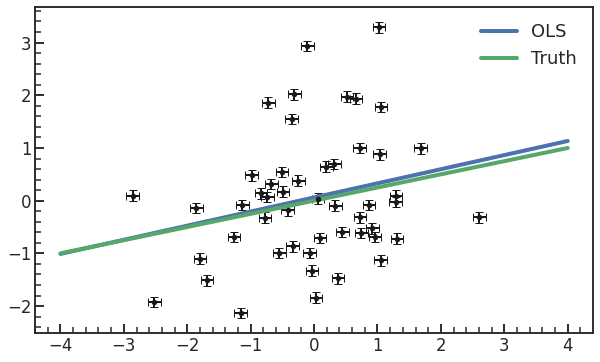

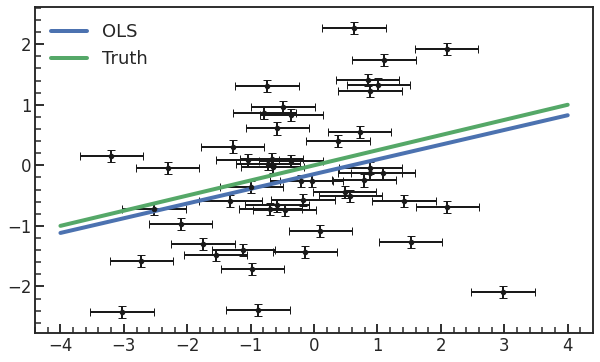

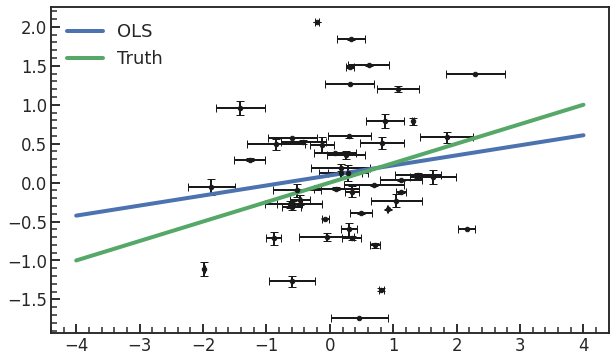

In [7]:
def get_slope_parameter(x, y):
    """Return the mean and variance of the OLS slope parameter"""
    corr = stats.pearsonr(x, y)[0]
    slope = corr * (np.std(y) / np.std(x))
    
    sigma2 = (np.var(y)**2 + np.var(x)**2)
    slope_var = sigma2 / np.sum((x-np.mean(x))**2)
    
    return slope, slope_var

def get_intercept_parameter(x, y, slope):
    """Return the mean of the OLS intercept parameter"""
    corr = stats.pearsonr(x, y)[0]
    intercept = np.mean(y) - slope*np.mean(x)
    
    return intercept

slope, slope_var = get_slope_parameter(df1.x, df1.y)
intercept = get_intercept_parameter(df1.x, df1.y, slope)
xrange = np.linspace(-4, 4, 100)
plt.figure()
plt.errorbar(df1.x, df1.y, yerr=df1.yerr, xerr=df1.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
plt.plot(xrange, f(xrange, slope, intercept), c='b', label="OLS")
plt.plot(xrange, f(xrange, m, b), c='g', label="Truth")
plt.legend()

slope, slope_var = get_slope_parameter(df2.x, df2.y)
intercept = get_intercept_parameter(df2.x, df2.y, slope)
xrange = np.linspace(-4, 4, 100)
plt.figure()
plt.errorbar(df2.x, df2.y, yerr=df2.yerr, xerr=df2.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
plt.plot(xrange, f(xrange, slope, intercept), c='b', label="OLS")
plt.plot(xrange, f(xrange, m, b), c='g', label="Truth")
plt.legend()

slope, slope_var = get_slope_parameter(df3.x, df3.y)
intercept = get_intercept_parameter(df3.x, df3.y, slope)
xrange = np.linspace(-4, 4, 100)
plt.figure()
plt.errorbar(df3.x, df3.y, yerr=df3.yerr, xerr=df3.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
plt.plot(xrange, f(xrange, slope, intercept), c='b', label="OLS")
plt.plot(xrange, f(xrange, m, b), c='g', label="Truth")
plt.legend()

## Regression Dilution in Simulation

In [8]:
def simulate(x, y, xerr, yerr, sample_size=10000):
    
    xsample = []
    ysample = []
    for i in range(len(x)):
        xdist = stats.norm(loc=x[i], scale=xerr[i])
        ydist = stats.norm(loc=y[i], scale=yerr[i])
        
        xsample.extend(xdist.rvs(size=sample_size))
        ysample.extend(ydist.rvs(size=sample_size))
    
    df = pd.DataFrame({
        "x": xsample,
        "y": ysample
    })
    
    return df


s1_df = simulate(df1.x, df1.y, df1.xerr, df1.yerr)
s2_df = simulate(df2.x, df2.y, df2.xerr, df2.yerr)
s3_df = simulate(df3.x, df3.y, df3.xerr, df3.yerr)

small_s1_df = simulate(df1.x, df1.y, df1.xerr, df1.yerr, sample_size=50)
small_s2_df = simulate(df2.x, df2.y, df2.xerr, df2.yerr, sample_size=50)
small_s3_df = simulate(df3.x, df3.y, df3.xerr, df3.yerr, sample_size=50)

## Regression Dilution in LINMIX

In [9]:
from linmix import linmix

lm1 = linmix.LinMix(df1.x, df1.y, df1.xerr, df1.yerr, K=3)
lm1.run_mcmc(silent=True)

lm2 = linmix.LinMix(df2.x, df2.y, df2.xerr, df2.yerr, K=3)
lm2.run_mcmc(silent=True)

lm3 = linmix.LinMix(df3.x, df3.y, df3.xerr, df3.yerr, K=3)
lm3.run_mcmc(silent=True)

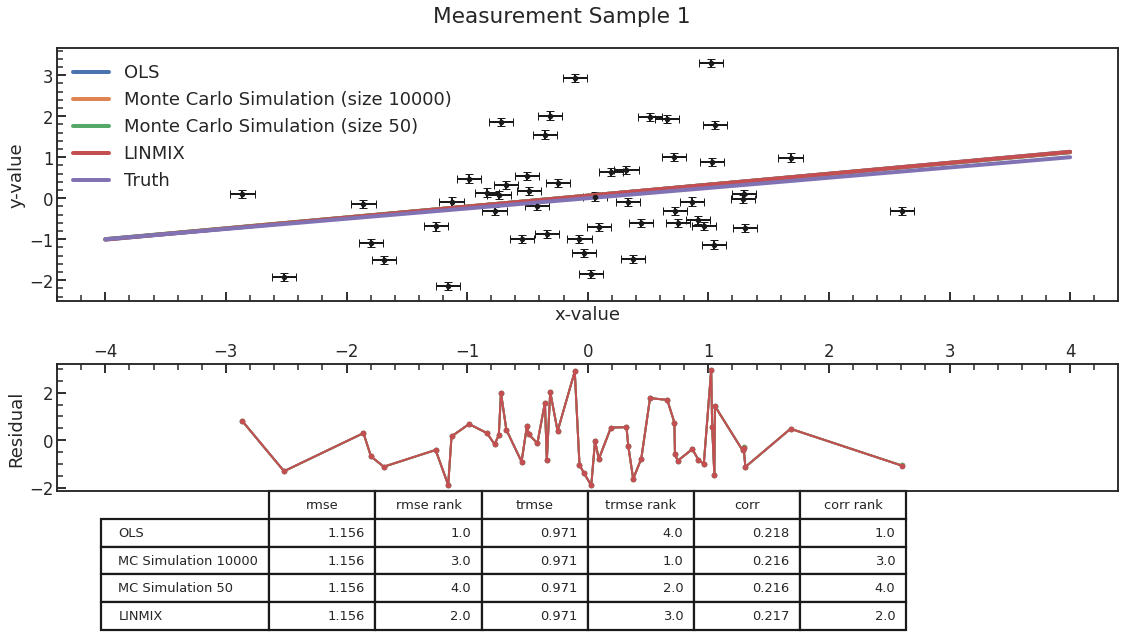

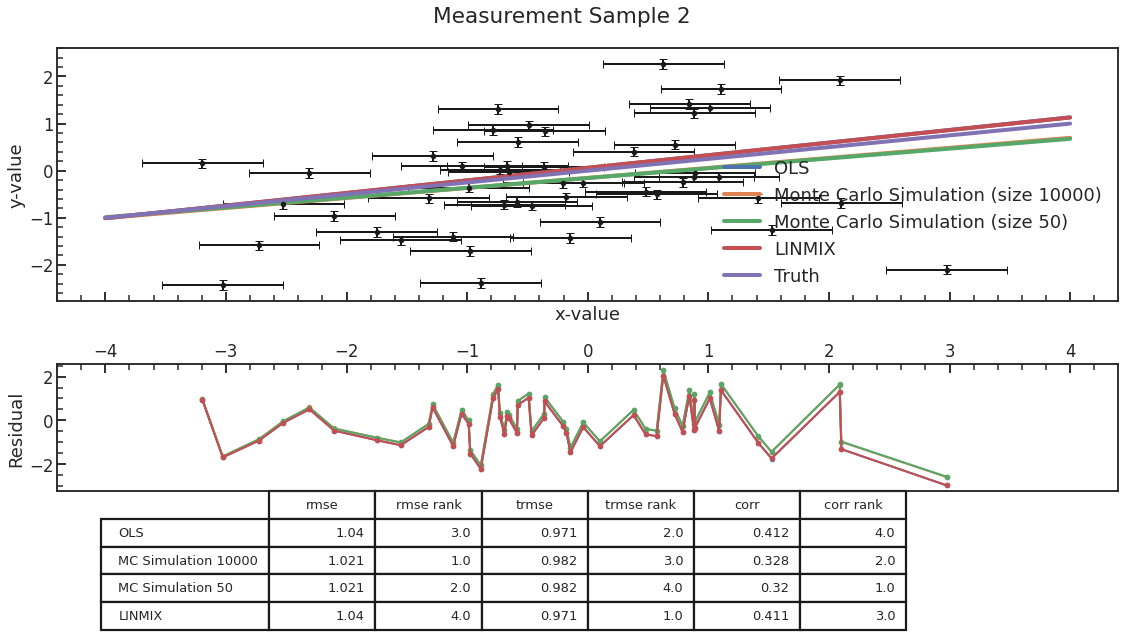

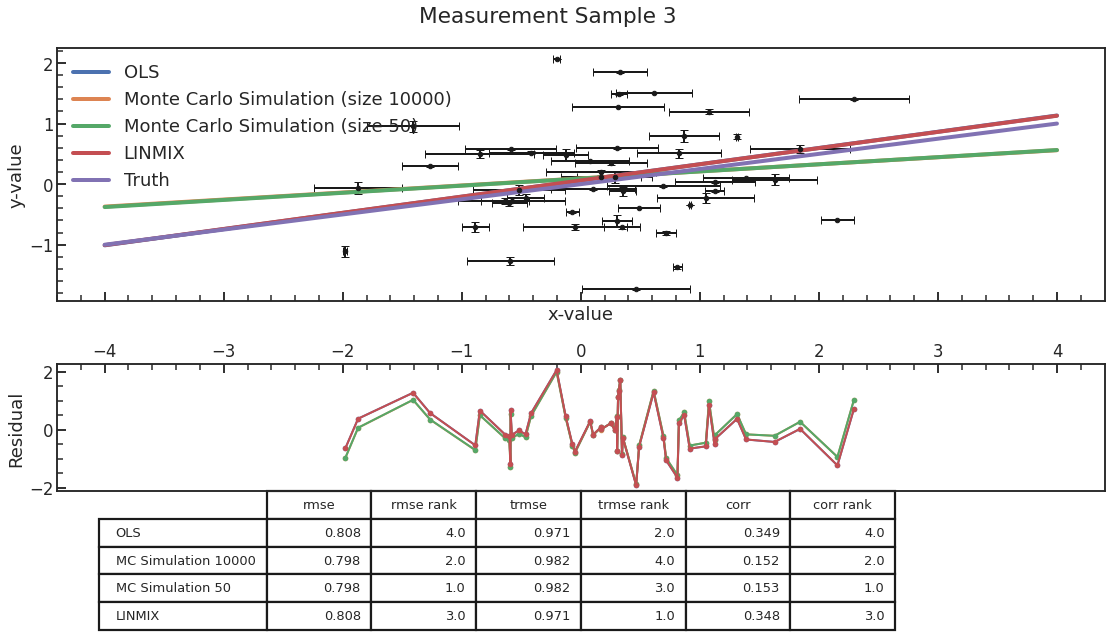

In [56]:
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred)**2))

def slope_to_corr(x, y, slope):
    return slope * (np.var(x) / np.var(y))

def summary_plot(df, s_df, small_s_df, title=""):
    fig, axes = plt.subplots(nrows=2, figsize=(16, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    fig.suptitle(title)
    ax1, ax2 = axes
    summary = []

    # Ordinary Least Squares
    slope, slope_var = get_slope_parameter(df1.x, df1.y)
    intercept = get_intercept_parameter(df1.x, df1.y, slope)
    xrange = np.linspace(-4, 4, 100)

    ax1.errorbar(df.x, df.y, yerr=df.yerr, xerr=df.xerr, c='k', fmt='.', elinewidth=2, capsize=4)
    ax1.plot(xrange, f(xrange, slope, intercept), label="OLS")
    ypred = slope*df.x + intercept
    ax2.plot(df.x, df.y - ypred, marker='.', lw=2)

    summary.append({
        "method": "OLS",
        "rmse": rmse(df.y, ypred),
        "trmse": rmse(y, slope*x+intercept),
        "corr": slope_to_corr(df.x, df.y, slope)
    })


    # MC Simulation 10000
    slope, slope_var = get_slope_parameter(s_df.x, s_df.y)
    intercept = get_intercept_parameter(s_df.x, s_df.y, slope)
    xrange = np.linspace(-4, 4, 100)
    ax1.plot(xrange, f(xrange, slope, intercept), label="Monte Carlo Simulation (size 10000)")
    ypred = slope*df.x + intercept
    ax2.plot(df.x, df.y - ypred, marker='.', lw=2)
    
    summary.append({
        "method": "MC Simulation 10000",
        "rmse": rmse(df.y, ypred),
        "trmse": rmse(y, slope*x+intercept),
        "corr": slope_to_corr(df.x, df.y, slope)
    })

    slope, slope_var = get_slope_parameter(small_s_df.x, small_s_df.y)
    intercept = get_intercept_parameter(small_s_df.x, small_s_df.y, slope)
    xrange = np.linspace(-4, 4, 100)
    ax1.plot(xrange, f(xrange, slope, intercept), label="Monte Carlo Simulation (size 50)")
    ypred = slope*df.x + intercept
    ax2.plot(df.x, df.y - ypred, marker='.', lw=2)

    summary.append({
        "method": "MC Simulation 50",
        "rmse": rmse(df.y, ypred),
        "trmse": rmse(y, slope*x+intercept),
        "corr": slope_to_corr(df.x, df.y, slope)
    })

    slope, intercept = np.mean(lm1.chain['beta']), np.mean(lm1.chain['alpha'])
    xrange = np.linspace(-4, 4, 100)
    ax1.plot(xrange, f(xrange, slope, intercept), label="LINMIX")
    ypred = slope*df.x + intercept
    ax2.plot(df.x, df.y - ypred, marker='.', lw=2)

    summary.append({
        "method": "LINMIX",
        "rmse": rmse(df.y, ypred),
        "trmse": rmse(y, slope*x+intercept),
        "corr": slope_to_corr(df.x, df.y, slope)
    })

    ax1.plot(xrange, f(xrange, m, b), label="Truth")


    ax1.legend()
    ax1.set_xlabel("x-value")
    ax1.set_ylabel("y-value")
    ax2.xaxis.tick_top()
    ax2.set_ylabel("Residual")
    
    summary_df = pd.DataFrame(summary)
    summary_df["rmse rank"] = stats.rankdata(summary_df.rmse, method="ordinal")
    summary_df["trmse rank"] = stats.rankdata(summary_df.trmse, method="ordinal")
    summary_df["corr rank"] = stats.rankdata(np.abs(summary_df["corr"] - rho_xy), method="ordinal")
    summary_df= summary_df.set_index("method")[["rmse", "rmse rank", "trmse", "trmse rank", "corr", "corr rank"]]
    # display(summary_df)

    plt_table = pd.plotting.table(ax2, summary_df.round(3))
    plt_table.scale(0.6, 3)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    filename = f'figures/{title.replace(" ", "_").lower()}.png'
    plt.savefig(filename)
    return summary_df


summary_plot(df1, s1_df, small_s1_df, title="Measurement Sample 1");
summary_plot(df2, s2_df, small_s2_df, title="Measurement Sample 2");
summary_plot(df3, s3_df, small_s3_df, title="Measurement Sample 3");